# **✨ Create Regression Model Using ARIMA Model✨** #

## **📍 Table of Content 📍**
- Business Understanding

- Data Preparation
    - Import Libraries
    - Import Datasets
    
- Data Understanding/Exploring Datasets
    - Data Shape
    - Data Info
    - Checking Missing Value
    - Checking Duplicate Rows
    
- Data Preprocessing
    - Rename Column
    - Change Data Type
    - Data Imputation
    - Create Forecasting Data for Modeling
    
- Exploratory Data Analysis
    - Check Quantity based on Date
    - Check ACF and PACF
    - Check Data Stationary
    
- Split Data Training and Testing

- ARIMA Model Prediction
    - Auto ARIMA Model Best Suit
    - Training Model
    - Model Evaluation
- Business Insight
    - Daily Quantiity Product Forecasting
    - Quantity Sold Each Product Forecasting
    
## **Datasets** ##
- [Customer](https://drive.google.com/file/d/1iC_2MvbHQsLq_uqSjejZnPExKcrKXsCa/view?usp=sharing)
- [Product](https://drive.google.com/file/d/1YHY_VunBnw2N9tYFsrGZwbTdLAsU_cAf/view?usp=sharing)
- [Store](https://drive.google.com/file/d/16N4dJOPb4ph3Jrx0dqrp3r2CJlSpTbnC/view?usp=sharing)
- [Transaction](https://drive.google.com/file/d/1CHLPSxzMBNtft64xf3R-FyU3W3rw3QTB/view?usp=sharing)

## **💡 Business Understanding** ##

The inventory team needs help from the Data Team to be able to help predict the sales volume (quantity) of the total number of Kalbe products.

The aim of this project is to find out estimate the quantity of product sold so that the team inventory can make stock daily inventory sufficient.

Predictions must be made daily.

## **💡 Data Preparation** ##

### **📌 Import Libraries** ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm
from tabulate import tabulate
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

### **📌 Import Dataset** ###

In [2]:
#Read all csv files
customers = pd.read_csv('database/Case Study - Customer.csv',sep=';')
product = pd.read_csv('database/Case Study - Product.csv',sep=';')
transaction = pd.read_csv('database/Case Study - Transaction.csv',sep=';')
store = pd.read_csv('database/Case Study - Store.csv',sep=';')

In [3]:
customers.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [6]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [7]:
# Merge all table into one

df = pd.merge(transaction, product,on='ProductID', suffixes = ('_customers', '_product'))
df = pd.merge(df, store, on='StoreID')
df = pd.merge(df, customers, on='CustomerID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_customers,Qty,TotalAmount,StoreID,Product Name,Price_product,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",36,0,Married,"10,53"
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"


## **💡 Data Understanding/Exploring Dataset** ##

### **📌 Data Shape** ##

In [8]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (5020, 19)
Number of rows : 5020
Number of columns : 19


### **📌 Data Info** ###

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    5020 non-null   object
 1   CustomerID       5020 non-null   int64 
 2   Date             5020 non-null   object
 3   ProductID        5020 non-null   object
 4   Price_customers  5020 non-null   int64 
 5   Qty              5020 non-null   int64 
 6   TotalAmount      5020 non-null   int64 
 7   StoreID          5020 non-null   int64 
 8   Product Name     5020 non-null   object
 9   Price_product    5020 non-null   int64 
 10  StoreName        5020 non-null   object
 11  GroupStore       5020 non-null   object
 12  Type             5020 non-null   object
 13  Latitude         5020 non-null   object
 14  Longitude        5020 non-null   object
 15  Age              5020 non-null   int64 
 16  Gender           5020 non-null   int64 
 17  Marital Status   4976 non-null   

### **📌 Checking Missing Value** ###

In [10]:
df.isna().sum()

TransactionID       0
CustomerID          0
Date                0
ProductID           0
Price_customers     0
Qty                 0
TotalAmount         0
StoreID             0
Product Name        0
Price_product       0
StoreName           0
GroupStore          0
Type                0
Latitude            0
Longitude           0
Age                 0
Gender              0
Marital Status     44
Income              0
dtype: int64

### **📌 Checking Duplicate Row** ###

In [11]:
df.duplicated().sum()

0

## **💡 Data Preprocessing** ##

### **📌 Rename Column** ###

In [12]:
for column in df.columns:
    df.rename(columns ={column: column.lower()}, inplace = True)
df.rename(columns = {'marital status': 'marital_status'}, inplace = True)
df.rename(columns = {'product name': 'product_name'}, inplace = True)
df.head()

,transactionid,customerid,date,productid,price_customers,qty,totalamount,storeid,product_name,price_product,storename,groupstore,type,latitude,longitude,age,gender,marital_status,income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR56601,328,24/12/2022,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",36,0,Married,"10,53"
2,TR89012,328,25/03/2022,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",36,0,Married,"10,53"
3,TR67395,328,22/01/2022,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"
4,TR45738,328,29/12/2022,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"


### **📌 Change Data Type** ###

In [13]:
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y', infer_datetime_format=True)
df.head()

,transactionid,customerid,date,productid,price_customers,qty,totalamount,storeid,product_name,price_product,storename,groupstore,type,latitude,longitude,age,gender,marital_status,income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36,0,Married,"10,53"
1,TR56601,328,2022-12-24,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",36,0,Married,"10,53"
2,TR89012,328,2022-03-25,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",36,0,Married,"10,53"
3,TR67395,328,2022-01-22,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"
4,TR45738,328,2022-12-29,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",36,0,Married,"10,53"


### **📌 Data Imputation** ###

After check Missing Value, there is 44 rows are Null in `marital_status`, we need do Data Imputation to fill Null Values

In [14]:
# fill null values with mode method
mode_marital_status = df['marital_status'].mode()[0]
df['marital_status'].fillna(mode_marital_status, inplace = True)
df.isna().sum()

transactionid      0
customerid         0
date               0
productid          0
price_customers    0
qty                0
totalamount        0
storeid            0
product_name       0
price_product      0
storename          0
groupstore         0
type               0
latitude           0
longitude          0
age                0
gender             0
marital_status     0
income             0
dtype: int64

### **📌 Create Forecasting Data for Modeling** ###

In [15]:
# make a new dataframe consisting of forecast dataframe
df_forecast = df[['date','qty']]
df_forecast = df_forecast.groupby('date')[['qty']].sum()
df_forecast.head()

,qty
date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30


## **💡 Exploratory Data Analysis** ##

### **📌 Check Quantity based on Date** ###

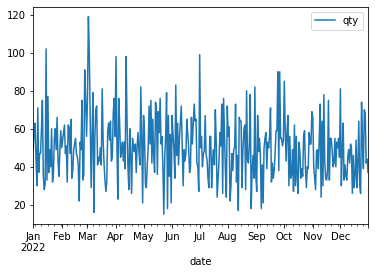

In [16]:
# Check the quantity based on date
df_forecast.plot()
plt.show()

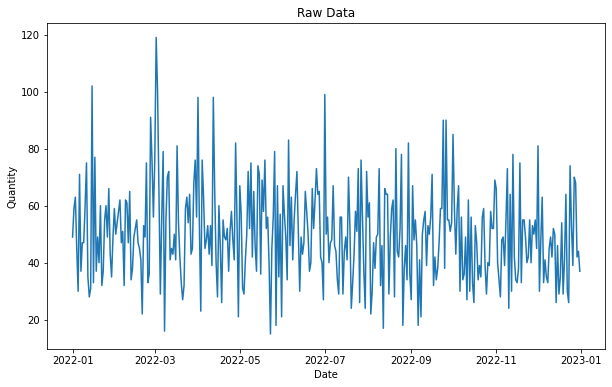

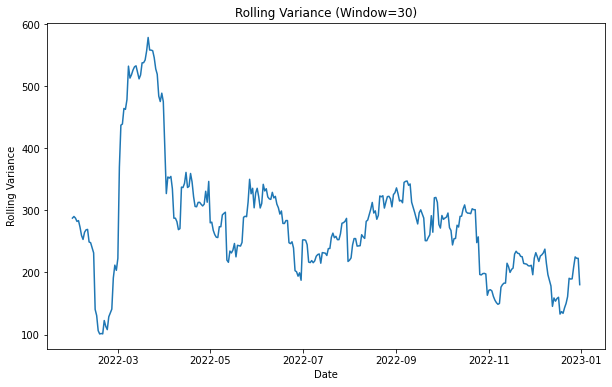

In [17]:
# Plot the raw data
plt.figure(figsize=(10, 6))
plt.plot(df_forecast.index, df_forecast['qty'])
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Raw Data')

# Compute rolling variance and plot
window = 30  # Adjust the window size as needed
rolling_var = df_forecast['qty'].rolling(window=window).var()
plt.figure(figsize=(10, 6))
plt.plot(df_forecast.index, rolling_var)
plt.xlabel('Date')
plt.ylabel('Rolling Variance')
plt.title(f'Rolling Variance (Window={window})')

plt.show()

### **📌 Check ACF and PACF** ###

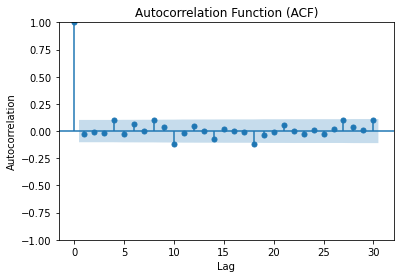

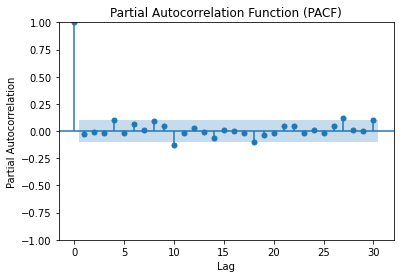

In [18]:
# Check ACF using default method
plot_acf(df_forecast, lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Check PACF using ywm method
plot_pacf(df_forecast, lags=30,  method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

### **📌 Check Data Stationary** ###

In [19]:
# Check data stationary
df_test = adfuller(df_forecast)
adf = df_test[0]
pval = df_test[1]

print('ADF Statistics : ', adf)
print('P Value : ', pval)
for key, value in df_test[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistics :  -19.448086319449082
P Value :  0.0
Critical Values:
   1%, -3.4484434475193777
Critical Values:
   5%, -2.869513170510808
Critical Values:
   10%, -2.571017574266393


## **💡 Split Data Training and Testing** ##

In [20]:
df_forecast.shape[0]

365

In [21]:
# Split Data Training and Testing
df_train = df_forecast.iloc[:-31]
df_test = df_forecast.iloc[-31:]

# Check the shapes of the train and test sets
print("Data Training:", df_train.shape)
print("Data Testing:", df_test.shape)

Data Training: (334, 1)
Data Testing: (31, 1)


## **💡 ARIMA Model Prediction** ##

### **📌 Auto ARIMA Model Best Suit** ###

In [22]:
# check Best Model using auto ARIMA
auto_arima_model = pm.auto_arima(df_train['qty'],
                                 seasonal=False,
                                 stepwise=False,
                                 suppress_warnings=True,
                                 trace = True)
auto_arima_model.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3067.753, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2969.103, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2939.868, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2897.396, Time=0.11 sec
 ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  334
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1432.364
Date:                Mon, 28 Aug 2023   AIC                           2878.729
Time:                        16:38:11   BIC                           2905.386
Sample:                    01-01-2022   HQIC                          2889.358
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0361      1.012     -0.036      0.972      -2.020       1.948
ar.L1         -0.8641      0.056    -15.420      0.000      -0.974      -0.754
ar.L2         -0.7198      0.068    -10.629      0.000      -0.852      -0.587
ar.L3         -0.6062      0.064     -9.450      0.000      -0.732      -0.480
ar.L4         -0.3322      0.059     -5.629      0.000      -0.448      -0.217
ar.L5         -0.1927      0.053     -3.668      0.000      -0.296      -0.090
sigma2       317.7588     24.003     13.238      0.000     270.714     364.804
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 4.88
Prob(Q):                              0.59   Prob(JB):                         0.09
Heteroskedasticity (H):               0.76   Skew:                             0.22
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **📌 Training Model** ###

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
# fit the ARIMA model using best model from auto arima
best_order = auto_arima_model.order
model = ARIMA (df_train, order=best_order)
arima_model = model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    qty   No. Observations:                  334
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1432.365
Date:                Mon, 28 Aug 2023   AIC                           2876.730
Time:                        16:38:11   BIC                           2899.579
Sample:                    01-01-2022   HQIC                          2885.841
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8641      0.055    -15.623      0.000      -0.972      -0.756
ar.L2         -0.7197      0.068    -10.630      0.000      -0.852      -0.587
ar.L3         -0.6062      0.064     -9.476      0.0

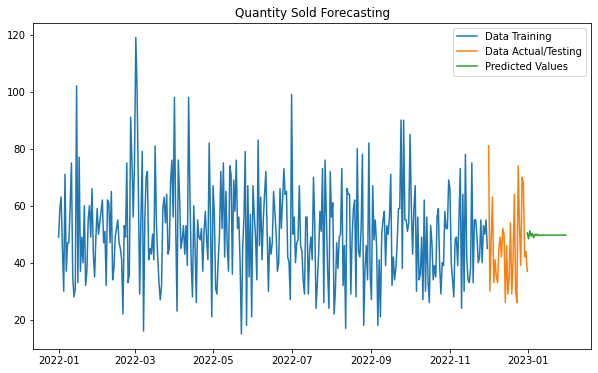

In [25]:
# Create new dataframe for forecasting
forecast_period = df_test.shape[0]
forecast = arima_model.forecast(steps=forecast_period)
forecast_index = pd.date_range(start=df_test.index[-1], periods=forecast_period)
df_forecast = pd.DataFrame(forecast, index=forecast_index, columns=['qty'])

# Plot and Visualize Predicted Values for Quantity Sold
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train['qty'], label='Data Training')
plt.plot(df_test.index, df_test['qty'], label='Data Actual/Testing')
plt.plot(df_forecast.index, forecast, label='Predicted Values')
plt.title('Quantity Sold Forecasting')
plt.legend()
plt.show()

### **📌 Model Evaluation** ###

In [26]:
mae = mean_absolute_error(df_test['qty'], forecast)
mape = mean_absolute_percentage_error(df_test['qty'], forecast) * 100
rmse = mean_squared_error(df_test['qty'], forecast, squared=False)

print(f"MAE: {mae}")
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse}")

MAE: 12.755126788053463
MAPE: 32.48%
RMSE: 15.053042797132266


## **💡 Business Insight** ##

### **📌 Daily Quantity Products Sold Forecasting** ###

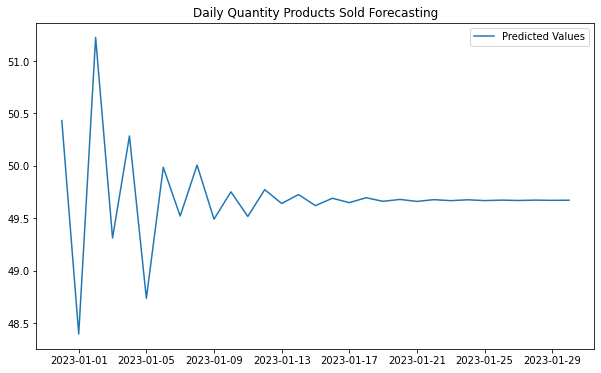

In [27]:
# Plot and Visualize Predicted Values for Quantity Sold
plt.figure(figsize=(10, 6))
plt.plot(df_forecast.index, forecast, label='Predicted Values')
plt.title('Daily Quantity Products Sold Forecasting')
plt.legend()
plt.show()

In [28]:
# Check Mean Quantity Sold per Day
avg_qty_sold = forecast.mean()
print(f"Average of Quantity Products Sold Per day: {avg_qty_sold}")

Average of Quantity Products Sold Per day: 49.69386054875526


**Observation:**

Based on graph above, It shows that **Daily Quantity Products Sold Forecasting** in the nex month with average all product sold each day is 49 - 50 pieces.

### **📌 Quantity Sold Each Product Forecasting** ###

In [29]:
# forecasting quantity of each product for 1 month
product_forecast = df[['qty', 'date', 'product_name']]

# List of product
product_list = product_forecast['product_name'].unique()

# Create new dataFrame to store the forecasts
forecast_date = pd.DataFrame({'date': pd.date_range(start='2023-01-01', end='2023-01-30')})

# Fit the function to ARIMA model and make the forecasts
def fit_arima_forecast(df_prod_forecast):
    model = ARIMA(df_prod_forecast['qty'], order=best_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=30)
    return forecast

# Group data by 'product_name', and then apply the forecasting function for each group
for i, group in product_forecast.groupby('product_name'):
    df_prod_forecast = group[['date', 'qty']]
    df_prod_forecast = df_prod_forecast.groupby('date')[['qty']].sum()

    # Set the index to fill missing dates
    df_prod_forecast = df_prod_forecast.reindex(pd.date_range(start='2022-01-01', end='2022-12-31'), fill_value=0)

    # Fit ARIMA model and make forecasts
    forecast1 = fit_arima_forecast(df_prod_forecast)

    # Add forecasts to the main DataFrame
    forecast_date[i] = forecast1.values

forecast_date = forecast_date.set_index('date')
forecast_date.head()

,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt
date,,,,,,,,,,
2023-01-01,1.820271,6.701247,5.023622,6.708973,6.106235,7.841138,2.643269,3.624533,4.672604,3.830957
2023-01-02,2.050780,7.967038,6.096409,6.570339,5.634547,8.999709,3.249200,1.761774,4.792271,4.280938
2023-01-03,1.838230,6.139172,5.936069,6.519189,5.230499,7.374542,2.876848,2.535615,3.967512,4.739068
2023-01-04,1.770446,6.653011,3.849957,6.750441,5.211875,6.900365,2.967520,3.141005,4.957475,4.547295
2023-01-05,1.244804,6.401178,5.129626,7.808847,4.899641,6.950302,2.926173,3.211266,4.874770,4.088417


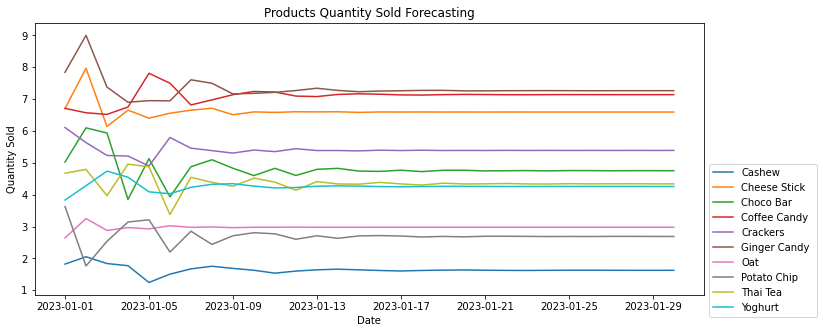

In [30]:
# Plot forecasting
plt.figure(figsize=(12, 5))
for i in forecast_date.columns:
    plt.plot(forecast_date.index, forecast_date[i], label=i)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.2))
plt.title('Products Quantity Sold Forecasting')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

In [31]:
# Check mean per product sold daily
avg_qty_per_product = df.groupby('product_name')['qty'].mean().round()
avg_qty_per_product_table = pd.DataFrame(avg_qty_per_product).reset_index()
avg_qty_per_product_table.columns = ['Product Name', 'Average of Quantity Sold Daily']

# Convert the DataFrame to a nicely formatted table
table = tabulate(avg_qty_per_product_table, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the table
print(table)

╒════════════════╤══════════════════════════════════╕
│ Product Name   │   Average of Quantity Sold Daily │
╞════════════════╪══════════════════════════════════╡
│ Cashew         │                                2 │
├────────────────┼──────────────────────────────────┤
│ Cheese Stick   │                                3 │
├────────────────┼──────────────────────────────────┤
│ Choco Bar      │                                6 │
├────────────────┼──────────────────────────────────┤
│ Coffee Candy   │                                4 │
├────────────────┼──────────────────────────────────┤
│ Crackers       │                                4 │
├────────────────┼──────────────────────────────────┤
│ Ginger Candy   │                                5 │
├────────────────┼──────────────────────────────────┤
│ Oat            │                                2 │
├────────────────┼──────────────────────────────────┤
│ Potato Chip    │                                3 │
├────────────────┼──────────

**Observation:**

Based on graph and table above, It shows that **Quantity Sold Each Product Forecasting** in the next month. Top 2 products that are predicted to sell the most every day are `Choco Bar` products with an average of 6 products sold per day, and `Ginger Candy` products with an average of 5 products sold per day.